In [11]:
import numpy as np
from scipy import signal
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt

Num: 1048576


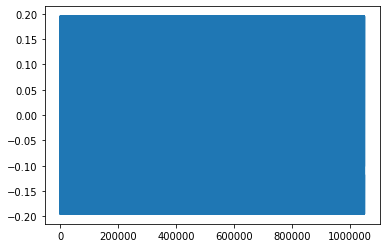

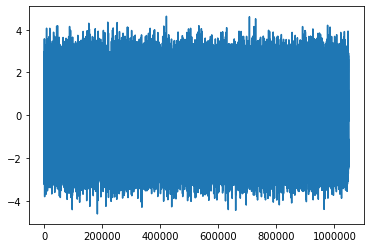

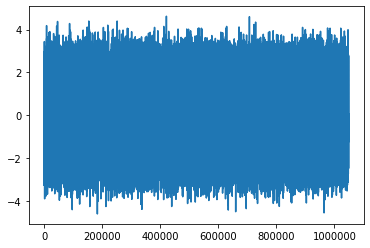

SNR: 0.00999647475806011
SNR(dB): -20.001531263041365


In [12]:
np.random.seed(123)

n = int(np.power(2., np.ceil(np.log2(1e6))))

print(f"Num: {n}")

fs = 1000.0
t = np.linspace(0, n, n, endpoint=False)
t /= fs

f_clean = 0.1*(np.sin(2*np.pi*50*t) + np.sin(2*np.pi*120*t))
f_noise = np.random.randn(len(t))
f = f_clean + f_noise

plt.plot(f_clean)
plt.show()
plt.plot(f_noise)
plt.show()
plt.plot(f)
plt.show()

snr = np.var(f_clean)/np.var(f_noise)
print(f"SNR: {snr}")
snr_db = 10*np.log10(snr)
print(f"SNR(dB): {snr_db}")

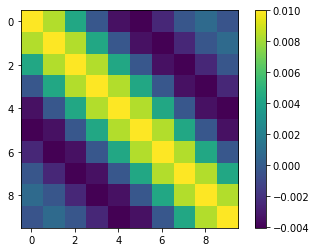

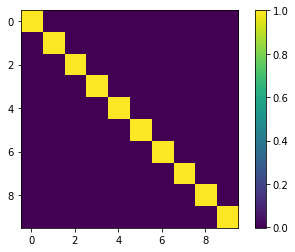

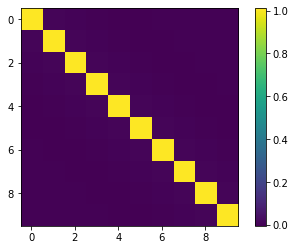

Noise only: 0.9981896197179718
Noise and signal: 1.0095507150821292
Diff: 0.011361095364157414


In [13]:
def pro_vec(y, t, l):
    return y[t:(t+l)]

def mult(y, t, l):
    return np.dot(pro_vec(y, t, l), pro_vec(y, t, l).T)
#     return np.outer(pro_vec(y, t, l), pro_vec(y, t, l)) 

def cal(y, l):
    y = y.reshape((-1, 1))
    r = np.zeros((l, l))
    for i in range(0, len(y)-l):
        r += mult(y, i, l)
    return r / (len(y)-l)

l = 10
c_clean = cal(f_clean, l)
c_noise = cal(f_noise, l)
c = cal(f, l)

# plt.imshow(cal(c_clean, l))
# plt.colorbar()
# plt.show()

# plt.imshow(cal(c_noise, l))
# plt.colorbar()
# plt.show()

# plt.imshow(cal(c, l))
# plt.colorbar()
# plt.show()

plt.imshow(c_clean)
plt.colorbar()
plt.show()

plt.imshow(c_noise)
plt.colorbar()
plt.show()

plt.imshow(c)
plt.colorbar()
plt.show()

def test1(x):
    t1 = x.sum()
    t2 = x.trace()
    return t1/t2

def test2(x):
    eig = linalg.eigvals(x)
    eig_max = np.max(eig)
    eig_min = np.min(eig)
    return eig_max/eig_min
    
print(f"Noise only: {test1(c_noise)}")
print(f"Noise and signal: {test1(c)}")
print(f"Diff: {test1(c)-test1(c_noise)}")

In [14]:
print(linalg.eigvals(c_noise))
print(linalg.eigvals(c_clean))
print(linalg.eigvals(c))

[0.99541021+0.j 0.99570044+0.j 0.99744804+0.j 0.99757247+0.j
 1.00436267+0.j 1.00411821+0.j 1.00127708+0.j 1.00188534+0.j
 1.00268807+0.j 1.0030723 +0.j]
[ 3.66214390e-02+0.j  3.23122990e-02+0.j  2.11610036e-02+0.j
  9.90513918e-03+0.j  1.59710487e-14+0.j  1.15957853e-14+0.j
 -3.81426089e-15+0.j  2.20319340e-15+0.j  2.45251657e-15+0.j
  2.41553037e-15+0.j]
[1.03481841+0.j 1.03321086+0.j 1.02010108+0.j 0.99576392+0.j
 0.99664363+0.j 1.00861009+0.j 1.00227805+0.j 1.00420597+0.j
 1.00324385+0.j 1.00306632+0.j]


In [15]:
u, s, vh = np.linalg.svd(c_noise, full_matrices=True)
un, sn, vhn = np.linalg.svd(c, full_matrices=True)
sn

array([1.03481841, 1.03321086, 1.02010108, 1.00861009, 1.00420597,
       1.00324385, 1.00306632, 1.00227805, 0.99664363, 0.99576392])